In [1]:
import pandas as pd

# Load the data
data_path = 'cardio_train.csv'
cardio_data = pd.read_csv(data_path, delimiter=';')

# Displaying the first few rows of the dataset and its summary statistics
display(cardio_data.head())
cardio_data.info()
cardio_data.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data Cleaning
## Handling outliers and incorrect values for blood pressure, height, and weight
cardio_data_clean = cardio_data[(cardio_data['height'] >= 100) & (cardio_data['height'] <= 220)]
cardio_data_clean = cardio_data_clean[(cardio_data_clean['weight'] >= 30) & (cardio_data_clean['weight'] <= 200)]
cardio_data_clean = cardio_data_clean[(cardio_data_clean['ap_hi'] > 0) & (cardio_data_clean['ap_hi'] < 300)]
cardio_data_clean = cardio_data_clean[(cardio_data_clean['ap_lo'] > 0) & (cardio_data_clean['ap_lo'] < 200)]

# Feature Engineering
## Converting age from days to years
cardio_data_clean['age_years'] = cardio_data_clean['age'] / 365.25

## Calculating BMI (Body Mass Index)
cardio_data_clean['bmi'] = cardio_data_clean['weight'] / ((cardio_data_clean['height'] / 100) ** 2)

# Initial EDA
## Checking the distribution and correlation after cleaning and feature engineering
display(cardio_data_clean[['age_years', 'bmi', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']].describe())

# Checking for any remaining missing values
missing_values = cardio_data_clean.isnull().sum()

# Correlation matrix to understand the relationship between features and the target variable
correlation_matrix = cardio_data_clean.corr()

missing_values, correlation_matrix['cardio']


,age_years,bmi,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
count,68949.000000,68949.000000,68949.00000,68949.000000,68949.00000,68949.000000,68949.000000,68949.000000,68949.000000
mean,53.289291,27.472914,164.39696,74.120711,126.32994,81.351840,1.364458,1.225964,0.494931
std,6.757111,5.349853,7.97843,14.304183,17.68939,9.801761,0.678730,0.571909,0.499978
min,29.563313,10.726644,100.00000,30.000000,7.00000,1.000000,1.000000,1.000000,0.000000
25%,48.342231,23.875115,159.00000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000
50%,53.938398,26.346494,165.00000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000
75%,58.379192,30.119376,170.00000,82.000000,140.00000,90.000000,1.000000,1.000000,1.000000
max,64.922656,152.551775,207.00000,200.000000,240.00000,190.000000,3.000000,3.000000,1.000000


(id             0
 age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 age_years      0
 bmi            0
 dtype: int64,
 id             0.003718
 age            0.239680
 gender         0.007661
 height        -0.011839
 weight         0.180050
 ap_hi          0.401728
 ap_lo          0.330670
 cholesterol    0.221429
 gluc           0.089676
 smoke         -0.016376
 alco          -0.008085
 active        -0.037381
 cardio         1.000000
 age_years      0.239680
 bmi            0.186382
 Name: cardio, dtype: float64)

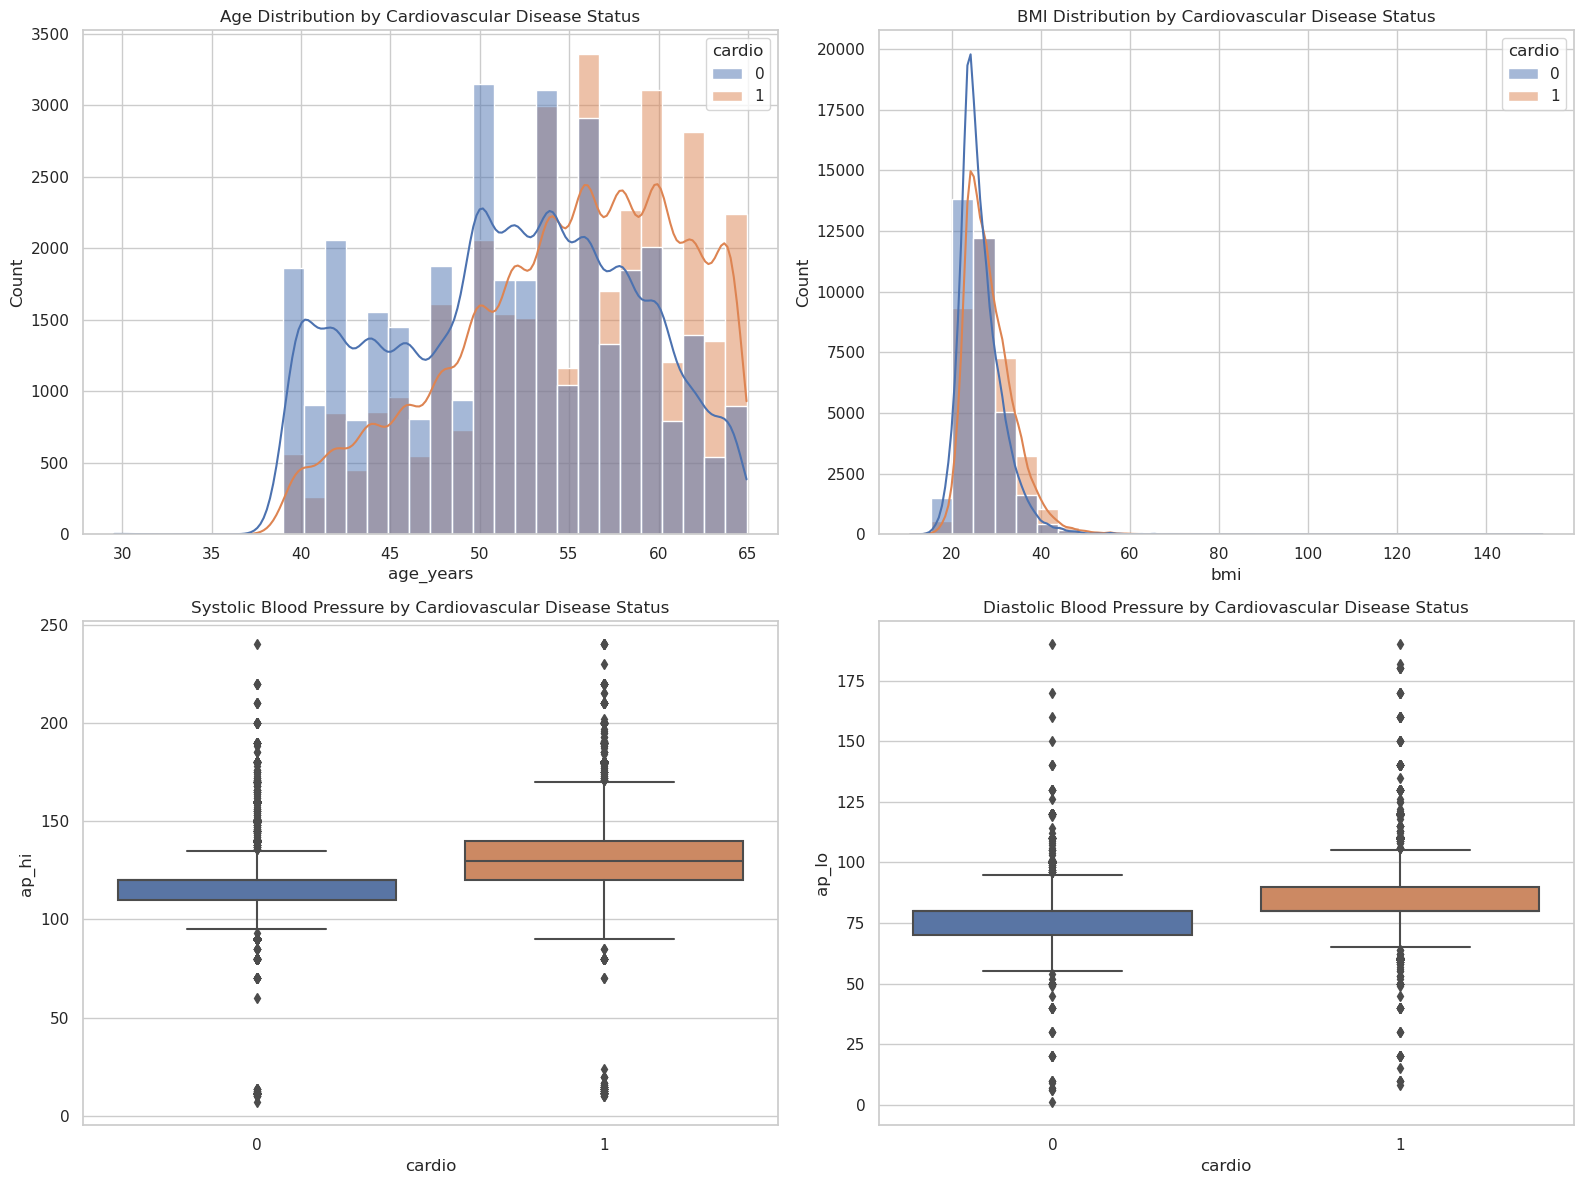

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions and relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of age in years for patients with and without cardiovascular disease
sns.histplot(data=cardio_data_clean, x="age_years", hue="cardio", kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution by Cardiovascular Disease Status')

# Distribution of BMI for patients with and without cardiovascular disease
sns.histplot(data=cardio_data_clean, x="bmi", hue="cardio", kde=True, ax=axes[0, 1], bins=30)
axes[0, 1].set_title('BMI Distribution by Cardiovascular Disease Status')

# Boxplot of systolic blood pressure by cardiovascular disease status
sns.boxplot(x="cardio", y="ap_hi", data=cardio_data_clean, ax=axes[1, 0])
axes[1, 0].set_title('Systolic Blood Pressure by Cardiovascular Disease Status')

# Boxplot of diastolic blood pressure by cardiovascular disease status
sns.boxplot(x="cardio", y="ap_lo", data=cardio_data_clean, ax=axes[1, 1])
axes[1, 1].set_title('Diastolic Blood Pressure by Cardiovascular Disease Status')

plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Preparing data for modeling
X = cardio_data_clean.drop(['cardio'], axis=1)  # Excluding the target variable
y = cardio_data_clean['cardio']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Preparing data for modeling
X = cardio_data_clean.drop(['id', 'cardio', 'age'], axis=1)
y = cardio_data_clean['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models with pipelines to include scaling
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42))
])
rf_clf = RandomForestClassifier(random_state=42)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(probability=True, random_state=42))
])

# Defining simplified hyperparameter grids
log_reg_params = {'log_reg__C': [0.1, 1]}
rf_params = {'n_estimators': [100], 'max_depth': [10]}
svm_params = {'svm__C': [1], 'svm__kernel': ['linear']}

# Performing the grid search
models = {
    'Logistic Regression': (log_reg_pipeline, log_reg_params),
    'Random Forest': (rf_clf, rf_params),
    'SVM': (svm_pipeline, svm_params)
}

results = []
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=2, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if model_name != 'SVM' else best_model.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'ROC AUC': roc_auc,
        'Best Params': grid_search.best_params_
    })

# Displaying the results
results_df = pd.DataFrame(results)
print(results_df)



Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
                 Model  Accuracy   ROC AUC  \
0  Logistic Regression  0.729152  0.794939   
1        Random Forest  0.738869  0.806707   
2                  SVM  0.728209  0.794120   

                              Best Params  
0                       {'log_reg__C': 1}  
1  {'max_depth': 10, 'n_estimators': 100}  
2  {'svm__C': 1, 'svm__kernel': 'linear'}  


In [8]:
# The best Random Forest model after refitting
rf_best = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_best.fit(X_train, y_train)

# Extracting feature importances
importances = rf_best.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Displaying the top features
print(importances_df.head())  


        Feature  Importance
3         ap_hi    0.399492
4         ap_lo    0.210935
10    age_years    0.136447
5   cholesterol    0.089477
11          bmi    0.062891
